# Image classification

## Setup

Import TensorFlow and other necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download and explore the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/Bark_Dataset').with_suffix('')

After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [ ]:
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)

5578


## Preprocess the dataset


In [ ]:
import tensorflow
import keras
import os
import glob
from skimage import io,color
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_path = '/content/drive/MyDrive/Bark_Dataset'
class_names = ['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis', 'Artocarpus heterophyllus', 'Barringtonia acutangula', 'Cananga odorata', 'Carica papaya', 'Casuarina equisetifolia', 'Cedrus', 'Chrysophyllum cainino', 'Citrus aurantiifolia', 'Citrus grandis', 'Cocos nucifera', 'Dalbergia oliveri', 'Delonix regia', 'Dipterocarpus alatus', 'Erythrina fusca', 'Eucalyptus', 'Ficus microcarpa', 'Ficus racemosa', 'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Hopea', 'Khaya senegalensis A.Juss', 'Khaya senegalensis', 'Lagerstroemia speciosa', 'Magnolia alba', 'Melaleuca', 'Melia azedarach', 'Musa', 'Nephelium lappaceum', 'Persea', 'Polyalthia longifolia', 'Prunnus', 'Prunus salicina', 'Psidium guajava', 'Pterocarpus macrocarpus', 'Senna siamea', 'Spondias mombin L', 'Syzygium nervosum', 'Tamarindus indica', 'Tectona grandis', 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia religiosa', 'Wrightia', 'Mangifera']

# apply glob module to retrieve files/pathnames

bark = os.path.join(dataset_path, class_names[1], '*')
bark = glob.glob(bark)

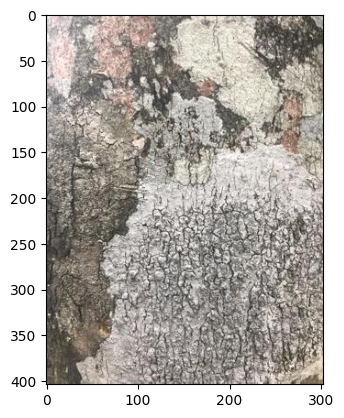

In [ ]:
# accessing an image file from the dataset classes
image = io.imread(bark[4])

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

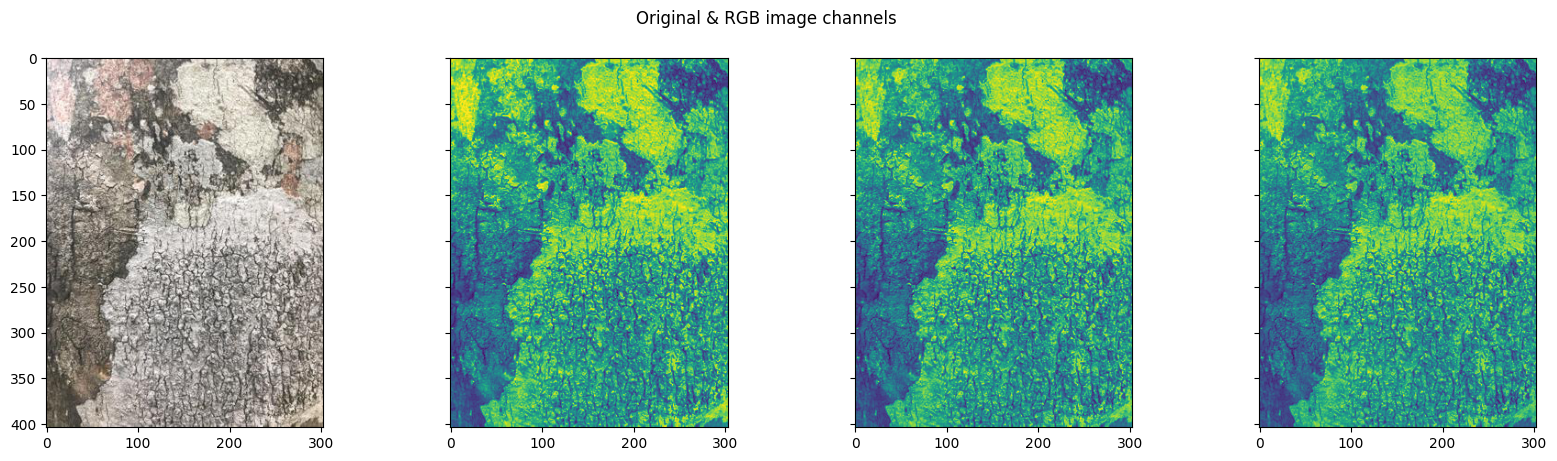

In [ ]:
# plotting the original image and the RGB channels

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

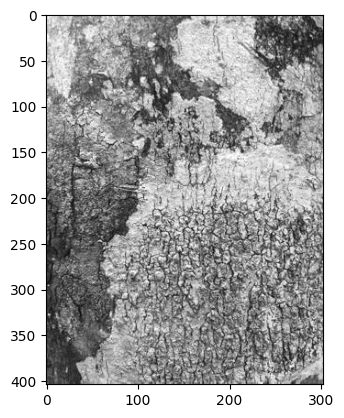

In [ ]:
gray_image = color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

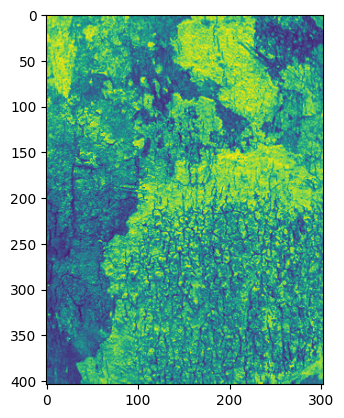

In [ ]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5578 files belonging to 50 classes.
Using 4463 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5578 files belonging to 50 classes.
Using 1115 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis', 'Artocarpus heterophyllus', 'Barringtonia acutangula', 'Cananga odorata', 'Carica papaya', 'Casuarina equisetifolia', 'Cedrus', 'Chrysophyllum cainino', 'Citrus aurantiifolia', 'Citrus grandis', 'Cocos nucifera', 'Dalbergia oliveri', 'Delonix regia', 'Dipterocarpus alatus', 'Erythrina fusca', 'Eucalyptus', 'Ficus microcarpa', 'Ficus racemosa', 'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Hopea', 'Khaya senegalensis', 'Khaya senegalensis A.Juss', 'Lagerstroemia speciosa', 'Magnolia alba', 'Mangifera', 'Melaleuca', 'Melia azedarach', 'Musa', 'Nephelium lappaceum', 'Persea', 'Polyalthia longifolia', 'Prunnus', 'Prunus salicina', 'Psidium guajava', 'Pterocarpus macrocarpus', 'Senna siamea', 'Spondias mombin L', 'Syzygium nervosum', 'Tamarindus indica', 'Tectona grandis', 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia', 'Wrightia religiosa']


## Visualize the data

Here are the first nine images from the training dataset:

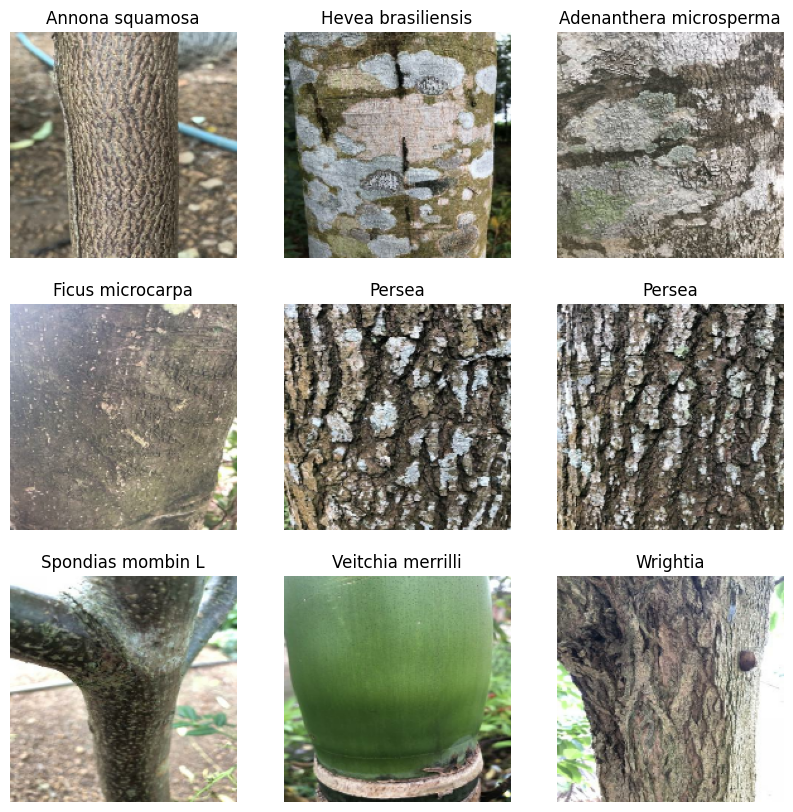

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0055580144 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
140/140 [==============================] - 7s 36ms/step - loss: 3.5614 - accuracy: 0.1239 - val_loss: 2.9690 - val_accuracy: 0.2422
Epoch 2/15
140/140 [==============================] - 3s 21ms/step - loss: 2.1517 - accuracy: 0.4291 - val_loss: 1.8511 - val_accuracy: 0.4717
Epoch 3/15
140/140 [==============================] - 3s 21ms/step - loss: 1.0862 - accuracy: 0.6959 - val_loss: 1.4862 - val_accuracy: 0.5848
Epoch 4/15
140/140 [==============================] - 3s 21ms/step - loss: 0.5114 - accuracy: 0.8537 - val_loss: 1.2516 - val_accuracy: 0.6574
Epoch 5/15
140/140 [==============================] - 3s 21ms/step - loss: 0.2703 - accuracy: 0.9243 - val_loss: 1.4137 - val_accuracy: 0.6484
Epoch 6/15
140/140 [==============================] - 3s 20ms/step - loss: 0.0949 - accuracy: 0.9798 - val_loss: 1.3610 - val_accuracy: 0.6870
Epoch 7/15
140/140 [==============================] - 3s 21ms/step - loss: 0.0458 - accuracy: 0.9906 - val_loss: 1.8218 - val_accuracy: 0.6628

## Visualize training results

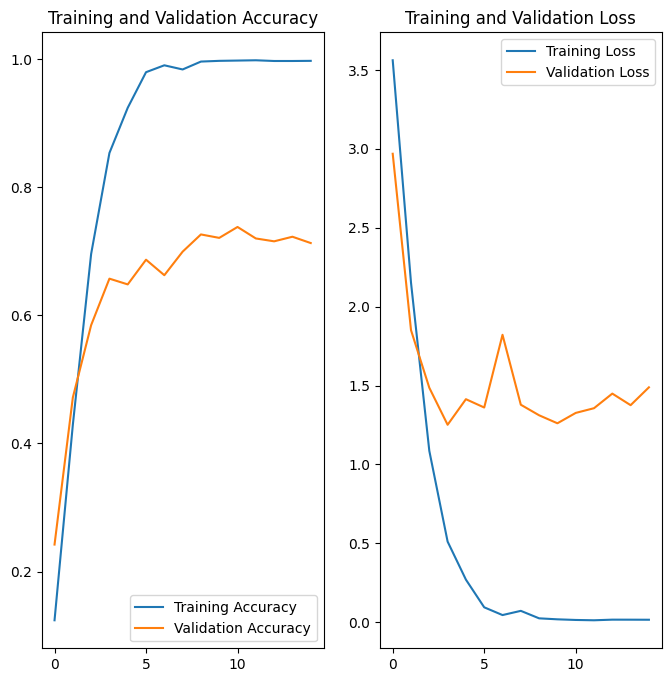

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Overfitting

## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
    layers.RandomFlip("vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomContrast(0.2)
  ]
)

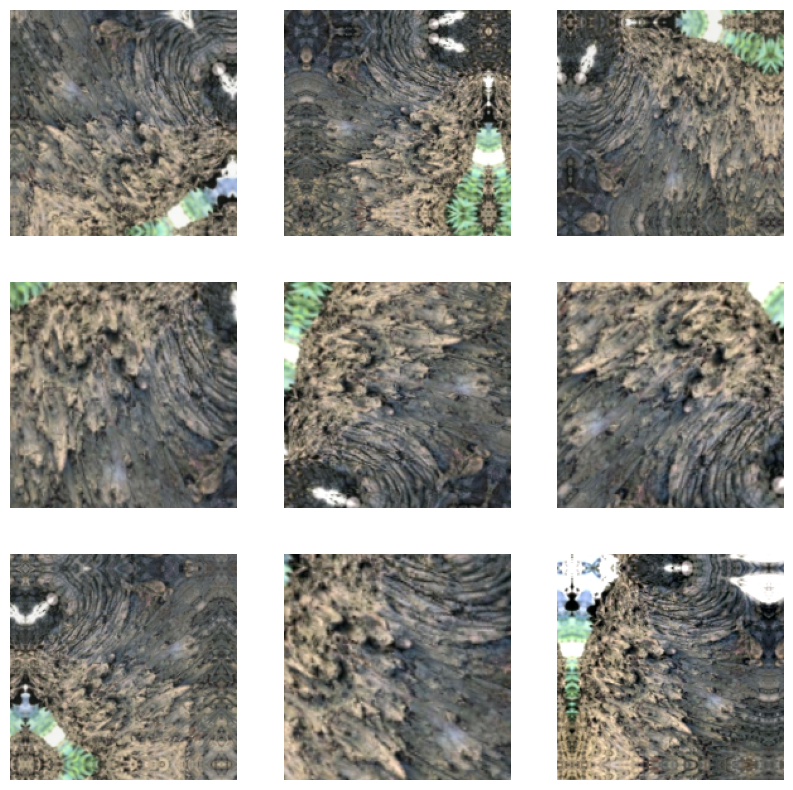

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 90
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/90
140/140 [==============================] - 8s 32ms/step - loss: 3.6451 - accuracy: 0.0865 - val_loss: 3.3681 - val_accuracy: 0.1094
Epoch 2/90
140/140 [==============================] - 4s 30ms/step - loss: 3.1461 - accuracy: 0.1750 - val_loss: 3.3588 - val_accuracy: 0.1632
Epoch 3/90
140/140 [==============================] - 4s 31ms/step - loss: 2.8036 - accuracy: 0.2357 - val_loss: 2.6389 - val_accuracy: 0.2744
Epoch 4/90
140/140 [==============================] - 4s 30ms/step - loss: 2.4735 - accuracy: 0.3184 - val_loss: 2.6840 - val_accuracy: 0.3148
Epoch 5/90
140/140 [==============================] - 4s 30ms/step - loss: 2.2304 - accuracy: 0.3702 - val_loss: 2.0319 - val_accuracy: 0.4135
Epoch 6/90
140/140 [==============================] - 4s 32ms/step - loss: 2.0864 - accuracy: 0.4065 - val_loss: 2.2470 - val_accuracy: 0.3587
Epoch 7/90
140/140 [==============================] - 4s 30ms/step - loss: 1.8065 - accuracy: 0.4782 - val_loss: 1.9068 - val_accuracy: 0.4834

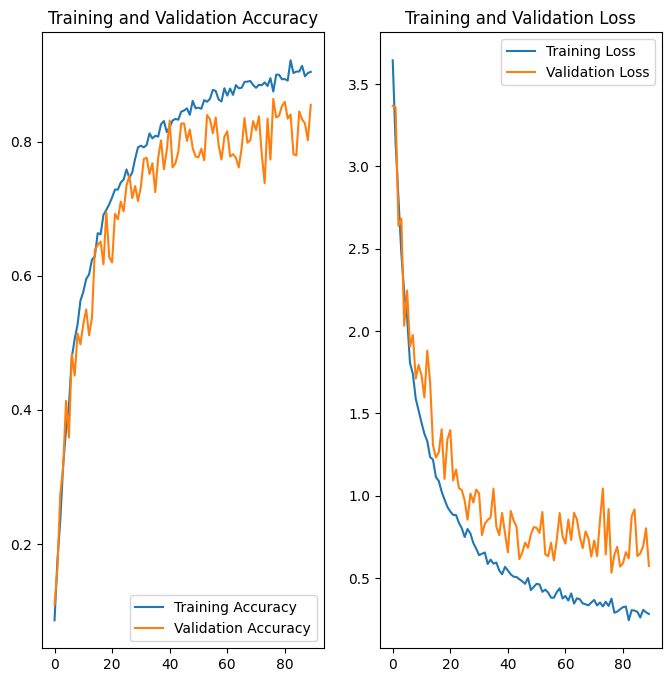

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

In [ ]:

path = '/content/drive/MyDrive/Bark_Dataset/Mangifera/IMG_3897.JPG'

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 222ms/step
This image most likely belongs to Mangifera with a 99.22 percent confidence.


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))

## Next steps

This tutorial showed how to train a model for image classification, test it, convert it to the TensorFlow Lite format for on-device applications (such as an image classification app), and perform inference with the TensorFlow Lite model with the Python API.

You can learn more about TensorFlow Lite through [tutorials](https://www.tensorflow.org/lite/tutorials) and [guides](https://www.tensorflow.org/lite/guide).